Integrantes: Gabriel Pires de Farias, Lorenzo Kirst de Souza

[Dataset](https://www.kaggle.com/datasets/wardabilal/spotify-global-music-dataset-20092025?select=track_data_final.csv)

[Slides]()

[Video]()




Importação dos dados em Python

In [104]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 534.0 kB/s eta 0:00:15
   -- ------------------------------------- 0.5/8.1 MB 534.0 kB/s eta 0:00:15
   --- ------------------------------------ 0.8/8.1 MB 621.8 kB/s eta 0:00:12
   ----- ---------------------------------- 1.0/8.1 MB 671.9 kB/s eta 0:00:11
   ----- ---------------------------------- 1.0/8.1 MB 671.9 kB/s eta 0:00:11
   ------ --------------------------------- 1.3/8.1 MB 666.9 kB/s eta 0:00:11
   ------ --------------------------------- 1.3/8.1 MB 666.9 kB/s eta 0:00:11
   ------ --------------------------------- 1.3/8.1 MB 666.9 kB/s eta 0:00:11
   ------- --------------------


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [229]:
import pandas as pd
filename = "track_data_final.csv"
df = pd.read_csv(filename)

Análise exploratória dos dados (dimensões, tipos, primeiras linhas, estatísticas descritivas)

In [197]:
linhas, colunas = df.shape
print('='*10 + "DIMENSOES" + '='*10)
print("Linhas: " + str(linhas))
print("Colunas: " + str(colunas))

==========DIMENSOES==========
Linhas: 8778
Colunas: 15


In [198]:
datatypes = df.dtypes
print()
print('='*10 + "TIPOS" + '='*10)
print(datatypes)
print()
print("numericos = int64, float64")
print("categoricos = object")
print("booleanos = bool")


==========TIPOS==========
track_id               object
track_name             object
track_number            int64
track_popularity        int64
track_duration_ms       int64
explicit                 bool
artist_name            object
artist_popularity     float64
artist_followers      float64
artist_genres          object
album_id               object
album_name             object
album_release_date     object
album_total_tracks      int64
album_type             object
dtype: object

numericos = int64, float64
categoricos = object
booleanos = bool


In [199]:
print()
print('='*10 + "PRIMEIRAS LINHAS" + '='*10)
print(df.head(4))


==========PRIMEIRAS LINHAS==========
                 track_id                           track_name  track_number  \
0  6pymOcrCnMuCWdgGVTvUgP                                    3            57   
1  2lWc1iJlz2NVcStV5fbtPG                               Clouds             1   
2  1msEuwSBneBKpVCZQcFTsU  Forever & Always (Taylor’s Version)            11   
3  7bcy34fBT2ap1L4bfPsl9q            I Didn't Change My Number             2   

   track_popularity  track_duration_ms  explicit     artist_name  \
0                61             213173     False  Britney Spears   
1                67             158760     False           BUNT.   
2                63             225328     False    Taylor Swift   
3                72             158463      True   Billie Eilish   

   artist_popularity  artist_followers      artist_genres  \
0               80.0        17755451.0            ['pop']   
1               69.0          293734.0  ['stutter house']   
2              100.0       145396321.

In [200]:
print(df.describe())

       track_number  track_popularity  track_duration_ms  artist_popularity  \
count   8778.000000       8778.000000        8778.000000        8774.000000   
mean       5.749487         52.232855      210157.791866          69.954981   
std        6.017938         24.075221       63326.841454          19.532783   
min        1.000000          0.000000           0.000000           0.000000   
25%        1.000000         39.000000      173921.250000          60.000000   
50%        4.000000         58.000000      207276.000000          74.000000   
75%        9.000000         71.000000      239693.250000          84.000000   
max      102.000000        100.000000      811077.000000         100.000000   

       artist_followers  album_total_tracks  
count      8.774000e+03         8778.000000  
mean       2.435487e+07           13.779790  
std        3.813769e+07           11.797943  
min        0.000000e+00            1.000000  
25%        5.152768e+05            6.000000  
50%        6

Tratamento de dados inválidos ou inconsistentes

In [230]:
df = df.sort_values('track_popularity', ascending=False) # Ordenando por ordem descendente de track_popularity

df = df.drop_duplicates(
    subset=['track_name', 'artist_name'], # Removendo linhas com mesmo track_name + artist_name
    keep='first' # Mantendo a primeira ocorrencia (a que tem maior track_popularity)
)


In [231]:
df = df[df['track_duration_ms'] != 0] # Removendo linhas com track_duration_ms = 0

In [ ]:
df = df.dropna() # Removendo linhas com valores NaN

In [203]:
print(df.describe())

       track_number  track_popularity  track_duration_ms  artist_popularity  \
count   7927.000000       7927.000000        7927.000000        7923.000000   
mean       5.808503         53.399773      209016.366469          68.708570   
std        6.003482         23.199412       64783.037415          19.814305   
min        1.000000          0.000000        4388.000000           0.000000   
25%        1.000000         40.000000      171370.000000          58.000000   
50%        4.000000         58.000000      205640.000000          73.000000   
75%        9.000000         71.000000      239399.500000          83.000000   
max      102.000000        100.000000      811077.000000         100.000000   

       artist_followers  album_total_tracks  
count      7.923000e+03         7927.000000  
mean       2.221550e+07           13.778731  
std        3.640208e+07           11.856893  
min        0.000000e+00            1.000000  
25%        3.513265e+05            6.000000  
50%        5

In [204]:
# Dados apos filtro
linhas, colunas = df.shape
print('='*10 + "DIMENSOES" + '='*10)
print("Linhas: " + str(linhas))
print("Colunas: " + str(colunas))

==========DIMENSOES==========
Linhas: 7927
Colunas: 15


Entendimento e explicação dos dados, variáveis e contexto do problema

In [ ]:
import matplotlib.pyplot as plt

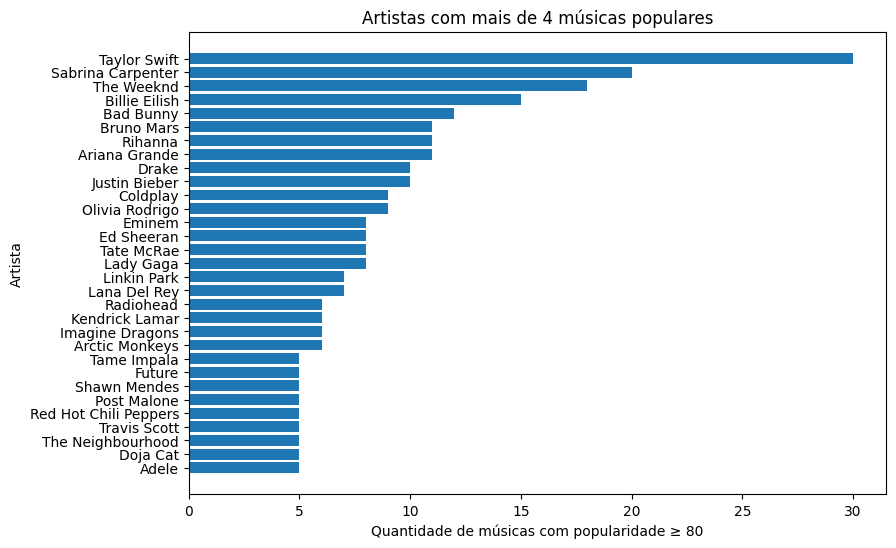

In [276]:
counts = df[df['track_popularity'] >= 80]['artist_name'].value_counts()
counts = counts[counts > 4]

plt.figure(figsize=(9, 6))
plt.barh(counts.index, counts.values)
plt.xlabel("Quantidade de músicas com popularidade ≥ 80")
plt.ylabel("Artista")
plt.title("Artistas com mais de 4 músicas populares")
plt.gca().invert_yaxis()  # Deixa os maiores no topo
plt.show()

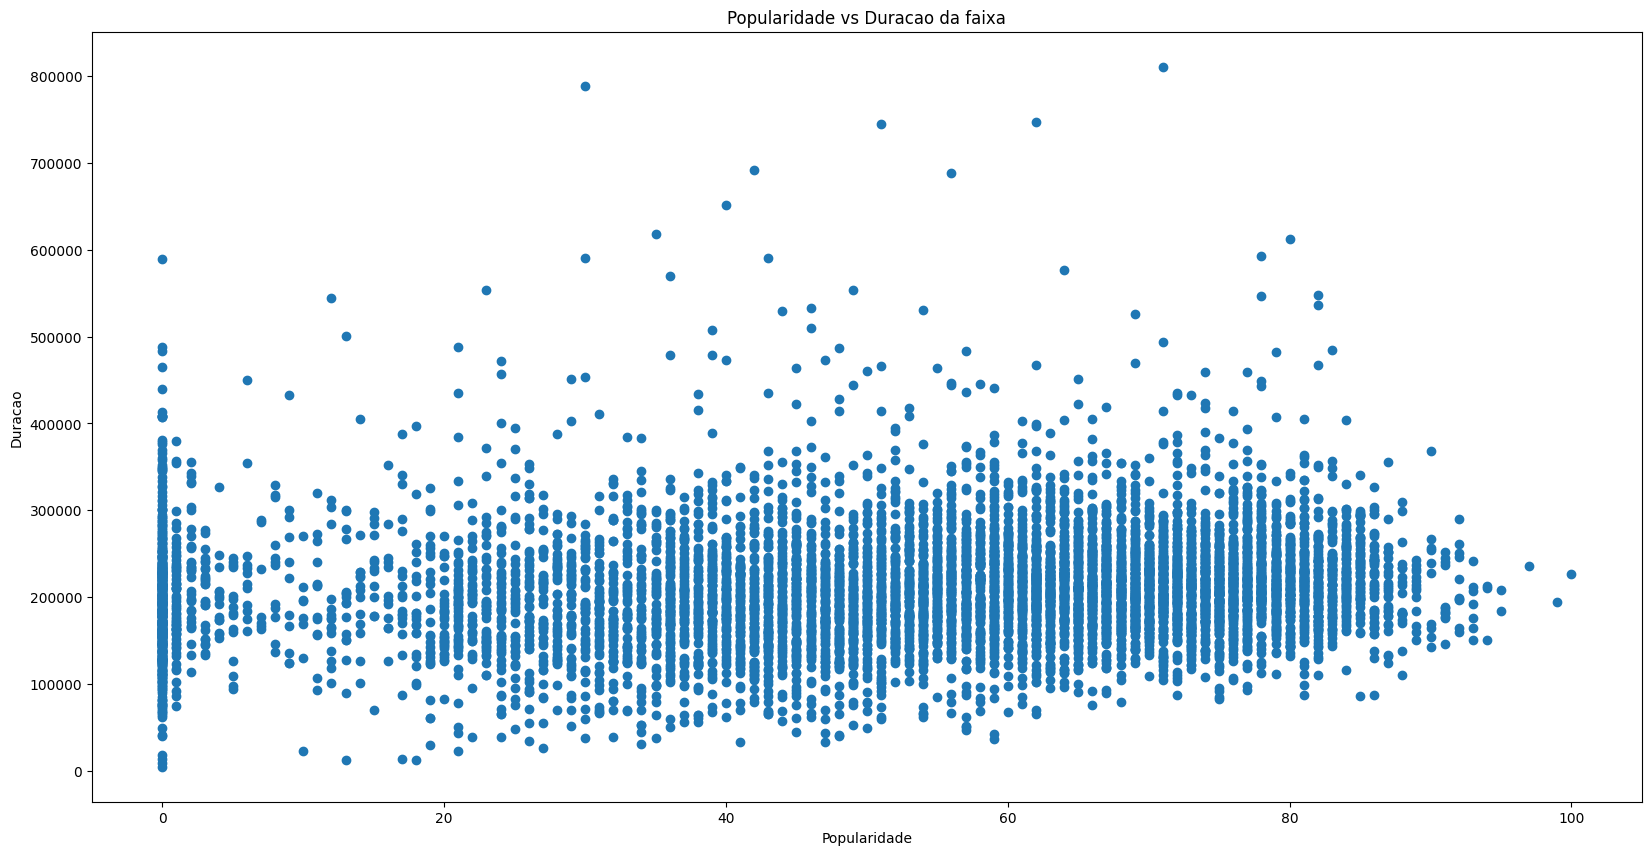

In [207]:
plt.figure(figsize=(20,10))
plt.scatter(df['track_popularity'], df['track_duration_ms'])
plt.xlabel("Popularidade")
plt.ylabel("Duracao")
plt.title("Popularidade vs Duracao da faixa")
plt.show()

In [239]:
musicas_oitenta_mais_popularidade = df["track_popularity"] >= 80
musicas_menos_oitenta_popularidade = df["track_popularity"] < 80
SETE_MINUTOS_EM_MS = 420000
musicas_sete_minutos_mais = df["track_duration_ms"] >= SETE_MINUTOS_EM_MS
a = df[musicas_oitenta_mais_popularidade]["track_id"].count()
b = df[(musicas_oitenta_mais_popularidade) & (musicas_sete_minutos_mais)]["track_id"].count()
c = df[musicas_menos_oitenta_popularidade]["track_id"].count()
d = df[(musicas_menos_oitenta_popularidade) & (musicas_sete_minutos_mais)]["track_id"].count()


print(b / a * 100) # Porcentagem de musicas com 7+ minutos em musicas com popularidade >=80
print(d / c * 100) # Porcentagem de musicas com 7+ minutos em musicas com popularidade <80

0.6915629322268326
0.986111111111111


In [267]:
generos_populares_exploded = df[musicas_oitenta_mais_popularidade]["artist_genres"].explode() # Explodindo valores para pode contar
generos_populares_values = generos_populares_exploded.value_counts()
generos_populares_top10 = generos_populares_values.head(10)

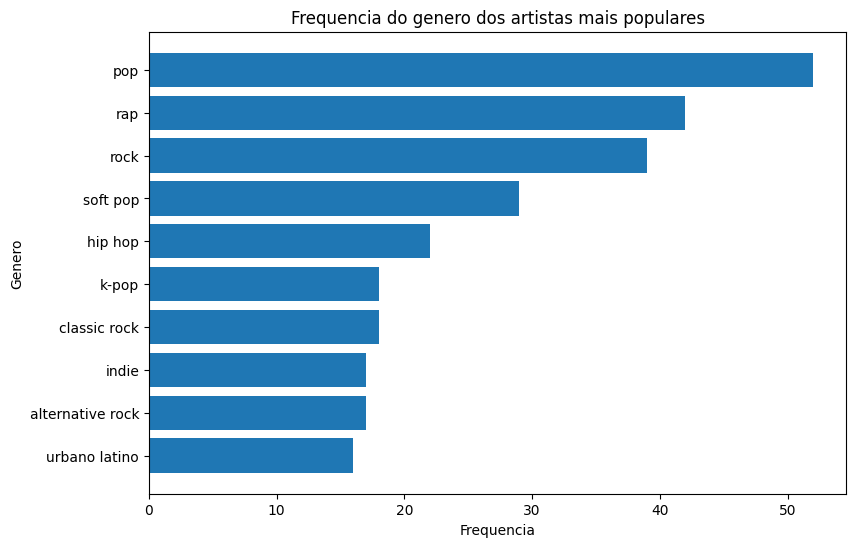

In [274]:
plt.figure(figsize=(9, 6))
plt.barh(
    generos_populares_top10.index,
    generos_populares_top10.values
)
plt.xlabel("Frequencia")
plt.ylabel("Genero")
plt.title("Frequencia do genero dos artistas mais populares")
plt.gca().invert_yaxis()
plt.show()

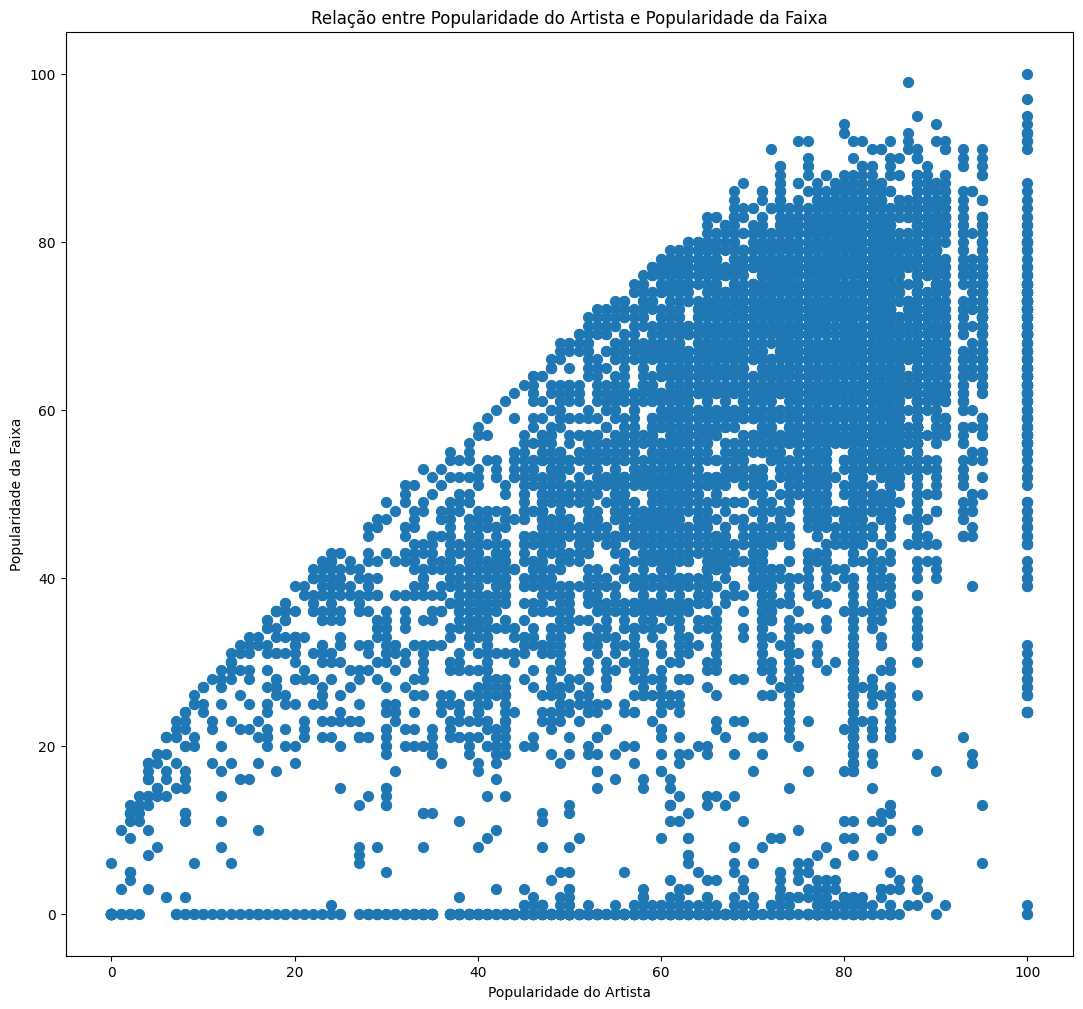

In [295]:
plt.figure(figsize=(13, 12))
plt.scatter(
    df["artist_popularity"],
    df["track_popularity"],
    s=50
)

plt.title('Relação entre Popularidade do Artista e Popularidade da Faixa')
plt.xlabel('Popularidade do Artista')
plt.ylabel('Popularidade da Faixa')
plt.show()

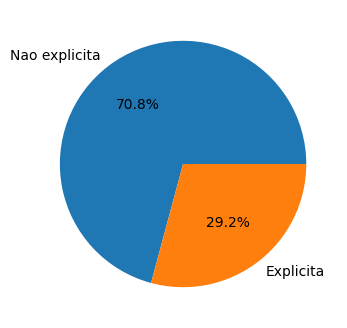

In [316]:
plt.figure(figsize=(6, 4))
plt.pie(
    df[musicas_oitenta_mais_popularidade]['explicit'].value_counts(),
    labels=["Nao explicita", "Explicita"],
    autopct="%1.1f%%"

)
plt.show()

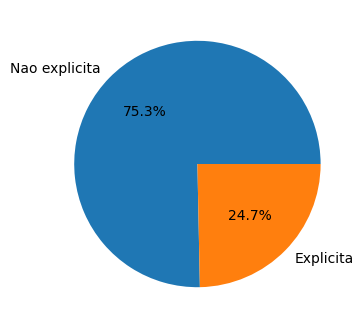

In [318]:
plt.figure(figsize=(6, 4))
plt.pie(
    df[musicas_menos_oitenta_popularidade]['explicit'].value_counts(),
    labels=["Nao explicita", "Explicita"],
    autopct="%1.1f%%"

)
plt.show()